In [9]:
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
# baseline cnn model for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY
 
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm
 
    
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
#	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = Adam(learning_rate=0.001)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	# prepare cross validation
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	# enumerate splits
	for train_ix, test_ix in kfold.split(dataX):
		# define model
		model = define_model()
		# select rows for train and test
		trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		# fit model
		estp = EarlyStopping(monitor='val_loss', min_delta=0.0005,patience=10, verbose=1, mode='auto',restore_best_weights=True)
		history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_data=(testX, testY), verbose=2, callbacks=[estp])
		# evaluate model
		_, acc = model.evaluate(testX, testY, verbose=0)
		print('> %.3f' % (acc * 100.0))
		# stores scores
		scores.append(acc)
		histories.append(history)
	return scores, histories
 
# plot diagnostic learning curves
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		# plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		# plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()
 
# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
	# box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()
 
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# evaluate model
	scores, histories = evaluate_model(trainX, trainY)
	# learning curves
	summarize_diagnostics(histories)
	# summarize estimated performance
	summarize_performance(scores)
	return scores, histories
    
 

Epoch 1/30
1500/1500 - 3s - loss: 0.1225 - accuracy: 0.9629 - val_loss: 0.0615 - val_accuracy: 0.9816
Epoch 2/30
1500/1500 - 3s - loss: 0.0448 - accuracy: 0.9855 - val_loss: 0.0540 - val_accuracy: 0.9837
Epoch 3/30
1500/1500 - 3s - loss: 0.0301 - accuracy: 0.9906 - val_loss: 0.0488 - val_accuracy: 0.9851
Epoch 4/30
1500/1500 - 3s - loss: 0.0224 - accuracy: 0.9926 - val_loss: 0.0420 - val_accuracy: 0.9879
Epoch 5/30
1500/1500 - 3s - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0742 - val_accuracy: 0.9797
Epoch 6/30
1500/1500 - 3s - loss: 0.0150 - accuracy: 0.9951 - val_loss: 0.0429 - val_accuracy: 0.9892
Epoch 7/30
1500/1500 - 3s - loss: 0.0123 - accuracy: 0.9956 - val_loss: 0.0529 - val_accuracy: 0.9883
Epoch 8/30
1500/1500 - 3s - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0434 - val_accuracy: 0.9900
Epoch 9/30
1500/1500 - 3s - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0564 - val_accuracy: 0.9879
Epoch 10/30
1500/1500 - 3s - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0435 - 

C:\Users\tsans\anaconda3\envs\py363\lib\site-packages\ipykernel_launcher.py:87: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
C:\Users\tsans\anaconda3\envs\py363\lib\site-packages\ipykernel_launcher.py:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


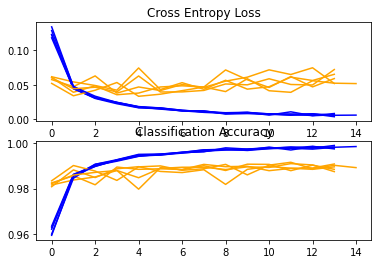

Accuracy: mean=98.868 std=0.069, n=5


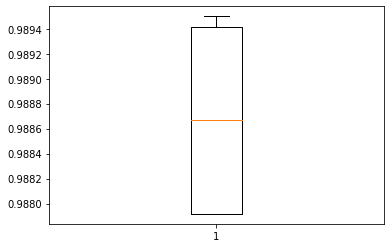

In [10]:
# entry point, run the test harness
scores,histories = run_test_harness()

In [11]:
import numpy as np
vl0=histories[0].history['val_loss']
vl0=np.array(vl0[0:13])

In [12]:
vl1=histories[1].history['val_loss']
vl1=np.array(vl1[0:13])

In [13]:
vl2=histories[2].history['val_loss']
vl2=np.array(vl2[0:13])

In [14]:
vl3=histories[3].history['val_loss']
vl3=np.array(vl3[0:13])

In [15]:
vl4=histories[4].history['val_loss']
vl4=np.array(vl4[0:13])

In [16]:
vlavg=[np.mean(k) for k in zip(vl0,vl1,vl2,vl3,vl4)]

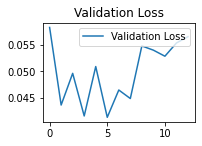

In [17]:
pyplot.subplot(2, 2, 2)
pyplot.plot(vlavg, label='Validation Loss')
pyplot.legend(loc='upper right')
pyplot.title('Validation Loss')
pyplot.show()

In [4]:
scores2=[]
histories2=[]
model = define_model()
trainX, trainY, testX, testY = load_dataset()

trainX, testX = prep_pixels(trainX, testX)

estp = EarlyStopping(monitor='val_loss', min_delta=0.0004,patience=9, verbose=1, mode='auto',restore_best_weights=True)
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_split=0.1, verbose=2, callbacks=[estp])
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print(' ')
print('Accuracy on Test Set -> %.3f' % (acc * 100.0))
# stores scores
scores2.append(acc)
histories2.append(history)

Epoch 1/30
1688/1688 - 3s - loss: 0.1140 - accuracy: 0.9639 - val_loss: 0.0445 - val_accuracy: 0.9862
Epoch 2/30
1688/1688 - 3s - loss: 0.0413 - accuracy: 0.9870 - val_loss: 0.0340 - val_accuracy: 0.9897
Epoch 3/30
1688/1688 - 3s - loss: 0.0279 - accuracy: 0.9914 - val_loss: 0.0308 - val_accuracy: 0.9915
Epoch 4/30
1688/1688 - 3s - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0381 - val_accuracy: 0.9890
Epoch 5/30
1688/1688 - 3s - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0375 - val_accuracy: 0.9920
Epoch 6/30
1688/1688 - 3s - loss: 0.0135 - accuracy: 0.9951 - val_loss: 0.0385 - val_accuracy: 0.9908
Epoch 7/30
1688/1688 - 4s - loss: 0.0103 - accuracy: 0.9964 - val_loss: 0.0429 - val_accuracy: 0.9912
Epoch 8/30
1688/1688 - 3s - loss: 0.0096 - accuracy: 0.9968 - val_loss: 0.0435 - val_accuracy: 0.9915
Epoch 9/30
1688/1688 - 3s - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.0397 - val_accuracy: 0.9920
Epoch 10/30
1688/1688 - 3s - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0376 - 

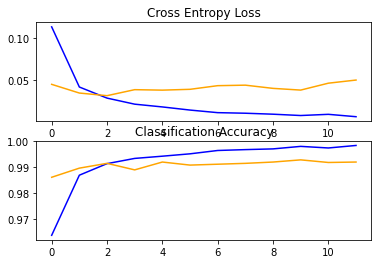

In [5]:
summarize_diagnostics(histories2)

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)              